In [17]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd


In [18]:
data = pd.read_csv('data/data2.txt', sep=" ", header=None)

This is the function we need to compare
$$\rho_{cal}(x,t) = \rho_0 \left(1 - \text{erf} \frac{x}{2 \sqrt{D t}} \right)$$

Note that the Gaussian error function can be approximate:
\begin{aligned}\operatorname {erf} z&={\frac {2}{\sqrt {\pi }}}\sum _{n=0}^{\infty }{\frac {(-1)^{n}z^{2n+1}}{n!(2n+1)}}\\[6pt]&={\frac {2}{\sqrt {\pi }}}\left(z-{\frac {z^{3}}{3}}+{\frac {z^{5}}{10}}-{\frac {z^{7}}{42}}+{\frac {z^{9}}{216}}-\cdots \right)\end{aligned}

We can approximate our original function to:
$$\rho_{cal}(x,t) = \rho_0 \left[1 - {\frac {2}{\sqrt {\pi }}}\left(\frac{x}{2 \sqrt{D t}}-{\frac {x^{3}}{6(D t)^{3/2}}}+\cdots \right) \right]$$

We need to formulate our problem in a linear form $y = Ap$, where $A = [[x \; 1]]$ and $p = [[m], [c]]$.  

Let us take only the first term of the expansion and simplify:
$$\frac{\rho_{cal}(x,t)}{p_0} = -\frac{x}{\sqrt {\pi D t}} +1 $$
Therefore:
\begin{gather}
y =  \frac{\rho_{cal}(x,t)}{p_0} \\
m =   - \frac{1}{\sqrt {\pi D t}} \\
c = 1
\end{gather}
Which gives us $D = \frac{1}{\pi m^2 t}$

In [30]:
X = data[0].values
# Y = data[1].values
Y = data[2].values

In [31]:
A = np.vstack([X, np.ones(len(X))]).T
print(A)

[[ 1.  1.]
 [ 3.  1.]
 [ 5.  1.]
 [ 7.  1.]
 [ 9.  1.]
 [11.  1.]
 [13.  1.]
 [15.  1.]
 [17.  1.]]


In [32]:
Y = Y[:, np.newaxis]
print(Y)

[[2.99]
 [2.64]
 [2.98]
 [2.7 ]
 [1.92]
 [1.41]
 [1.14]
 [0.6 ]
 [0.33]]


In [33]:
alpha = (np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),Y))
print(alpha)

[[-0.18108333]
 [ 3.48641667]]


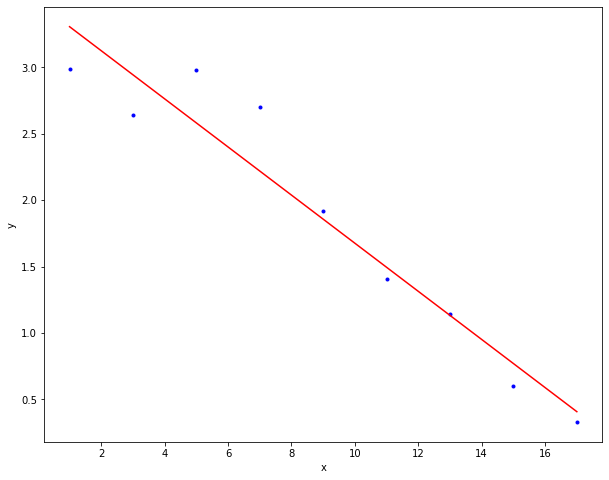

In [34]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(X, Y, 'b.')
plt.plot(X, alpha[0]*X + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [29]:
alpha = np.linalg.lstsq(A, Y, rcond=None)[0]
print(alpha)

[[-0.09875   ]
 [ 1.38097222]]
